# Проверка гипотез по увеличению выручки в интернет-магазине

## Часть 0. Загрузка данных и подготовка их к анализу

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 999)
tables = []

In [3]:
hypothesis = pd.read_csv('datasets/hypothesis.csv')
tables.append(hypothesis)
hypothesis.name = 'hypothesis'
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
orders = pd.read_csv('datasets/orders.csv')
tables.append(orders)
orders.name = 'orders'
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors = pd.read_csv('datasets/visitors.csv')
tables.append(visitors)
visitors.name = 'visitors'
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
# функция вывода информации о таблицах
def tables_information():
    for table in tables:
        print(f'Информация о таблице {table.name}:')
        display(table.columns)
        display(table.info())
        display(table.describe())
        print(f'Количество дублей {table.duplicated().sum()}\n')

In [7]:
tables_information()

Информация о таблице hypothesis:


Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Количество дублей 0

Информация о таблице orders:


Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Количество дублей 0

Информация о таблице visitors:


Index(['date', 'group', 'visitors'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Количество дублей 0



In [8]:
# перевод имен колонок к нижнему регистру и замена пробелов
for table in tables:
    for column in table.columns:
        table.rename(columns={column: str.lower(column).replace(' ', '_')}, inplace=True)    

In [9]:
orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}, inplace=True)

In [10]:
# преобразование типов колонок с датами к datetime
orders['date'] = orders['date'].astype('datetime64')
visitors['date'] = visitors['date'].astype('datetime64')

In [11]:
tables_information()

Информация о таблице hypothesis:


Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,reach,impact,confidence,efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Количество дублей 0

Информация о таблице orders:


Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Количество дублей 0

Информация о таблице visitors:


Index(['date', 'group', 'visitors'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Количество дублей 0



### Часть 0. Загрузка данных и подготовка их к анализу. Вывод

Представленные таблицы не содержат дубли и пропуски. В таблице hypothesis названия колонок преобразованы к нижнему регистру. Во таблицах visitors и orders типы колонок с датами преобразованы к datetime. В таблице orders названия двух колонок изменены для лучшей читабельности.

## Часть 1. Приоритизация гипотез

### Фреймворк ICE для приоритизации гипотез, сортировка гипотез по убыванию приоритета

In [12]:
# переименование индекса в понятное название
hypothesis.index.rename('number', inplace=True)

In [13]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head()

,hypothesis,ICE
number,,
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000


### Фреймворк RICE для приоритизации гипотез, сортировка гипотез по убыванию приоритета

In [14]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head()

,hypothesis,RICE
number,,
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


### Как изменилась приоритизация гипотез при применении RICE вместо ICE? Почему так произошло?

Топ-5 гипотез в ICE: 8, 0, 7, 6, 2. Топ-5 гипотез в RICE: 7, 2, 0, 6, 8. Фреймворк RICE включает в себя параметр Reach — скольких пользователей затронет изменение. Поэтому в RICE в приоритете те гипотезы, которые относятся к большему количеству пользователей.

## Часть 2. Анализ A/B-теста

### 1. График кумулятивной выручки по группам. Выводы и предположения

In [15]:
def show_cummulative_data(table_orders=orders, table_visitors=visitors, show_result=False):
    
    # создаем массив уникальных пар значений дат и групп теста
    dates_groups = orders[['date','group']].drop_duplicates()

    # получаем агрегированные кумулятивные по дням данные о заказах 
    orders_aggregated = (dates_groups
     .apply(lambda x: table_orders[np.logical_and(table_orders['date'] <= x['date'],
                                                  table_orders['group'] == x['group'])]
         .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique',
         'revenue' : 'sum'}), axis=1)
     .sort_values(by=['date','group'])
    )
    # получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
    visitors_aggregated = (dates_groups
     .apply(lambda x: table_visitors[np.logical_and(table_visitors['date'] <= x['date'],
                                                    table_visitors['group'] == x['group'])]
            .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
    )
    # объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
    result = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
    result.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
    if show_result == True:
        display(result.head())
    return result

In [16]:
cummulative_data = show_cummulative_data(show_result=True)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


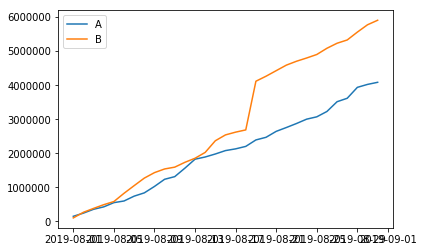

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulative_revenue_a = cummulative_data[cummulative_data['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulative_revenue_b = cummulative_data[cummulative_data['group']=='B'][['date', 'revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cummulative_revenue_a['date'], cummulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulative_revenue_b['date'], cummulative_revenue_b['revenue'], label='B')
plt.legend()
plt.show()

Выручка увеличивается в течение всего теста. Однако график выручки группы B в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### 2. График кумулятивного среднего чека по группам. Выводы и предположения

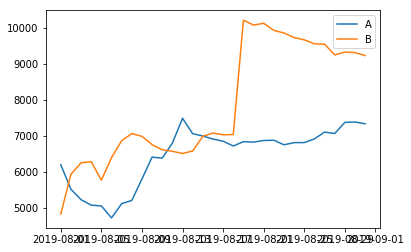

In [18]:
plt.plot(cummulative_revenue_a['date'], cummulative_revenue_a['revenue']/cummulative_revenue_a['orders'], label='A')
plt.plot(cummulative_revenue_b['date'], cummulative_revenue_b['revenue']/cummulative_revenue_b['orders'], label='B')
plt.legend()
plt.show()

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### 3. График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения

In [19]:
def show_cummulative_revenue(table):
    
    # датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
    cummulative_revenue_a = table[table['group']=='A'][['date', 'revenue', 'orders']]

    # датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
    cummulative_revenue_b = table[table['group']=='B'][['date', 'revenue', 'orders']]
    
    # собираем данные в одном датафрейме
    result = cummulative_revenue_a.merge(cummulative_revenue_b, on='date', suffixes=['A', 'B'])
    
    # cтроим отношение средних чеков
    (plt.plot(result['date'],
              (result['revenueB']/result['ordersB'])/
              (result['revenueA']/result['ordersA'])-1)
    )
    # добавляем ось X
    plt.axhline(y=0, color='black', linestyle='--')
    plt.show()

График относительного изменения кумулятивного среднего чека группы B к группе A


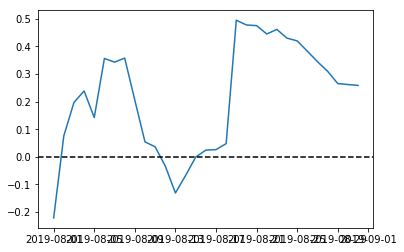

In [20]:
print('График относительного изменения кумулятивного среднего чека группы B к группе A')
show_cummulative_revenue(show_cummulative_data())

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

### 4. График кумулятивной конверсии по группам. Выводы и предположения

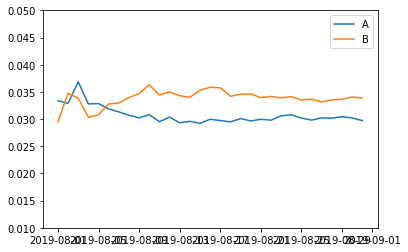

In [21]:
# считаем кумулятивную конверсию
cummulative_data['conversion'] = cummulative_data['orders']/cummulative_data['visitors']

# отделяем данные по группе A
cummulative_data_a = cummulative_data[cummulative_data['group']=='A']

# отделяем данные по группе B
cummulative_data_b = cummulative_data[cummulative_data['group']=='B']

# строим графики
fig, ax = plt.subplots()
plt.plot(cummulative_data_a['date'], cummulative_data_a['conversion'], label='A')
plt.plot(cummulative_data_b['date'], cummulative_data_b['conversion'], label='B')
plt.legend()

# задаем масштаб осей
#plt.axis(['2019-08-01', '2019-08-31', 0.01, 0.05])
ax.set(ylim=(0.01, 0.05))
plt.show()

Симметричный график получился! Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

### 5. График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения

In [22]:
def show_merged_cummulative_conversions(table):
    table['conversion'] = table['orders'] / table['visitors']

    # отделяем данные по группе A
    table_a = table[table['group']=='A']

    # отделяем данные по группе B
    table_b = table[table['group']=='B']
    
    result = (table_a[['date','conversion']]
     .merge(table_b[['date','conversion']], on='date', suffixes=['A', 'B'])
    )
    fig, ax = plt.subplots()
    (plt.plot(result['date'], result['conversionB']/result['conversionA']-1,
              label="Относительный прирост конверсии группы B относительно группы A")
    )
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axhline(y=0.1, color='grey', linestyle='--')
    #plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])
    ax.set(ylim=(-0.3, 0.3))
    plt.show()

График относительного изменения кумулятивной конверсии группы B к группе A


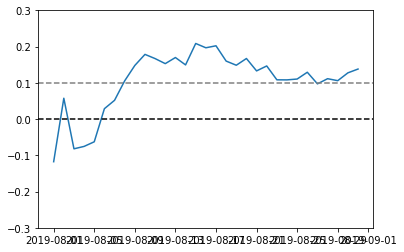

In [23]:
print('График относительного изменения кумулятивной конверсии группы B к группе A')
show_merged_cummulative_conversions(show_cummulative_data())

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия немного падала, но теперь стабильнее. В целом отношение конверсии установилось, и можно сделать вывод по тесту: конверсия группы B больше конверсии группы A.

### 6. Точечный график количества заказов по пользователям. Выводы и предположения

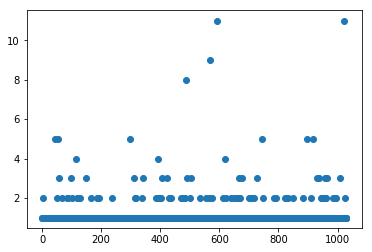

In [24]:
orders_by_users = (orders[['transaction_id', 'visitor_id']]
                   .groupby('visitor_id', as_index=False)
                   .agg({'transaction_id' : 'nunique'})
                  )
orders_by_users.rename(columns={'transaction_id': 'orders'}, inplace=True)
orders_by_users.sort_values(by='orders', ascending=False)
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.show()

Выводы подтверждаются: много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### 7. 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей

In [25]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### 8. Точечный график стоимостей заказов. Выводы и предположения

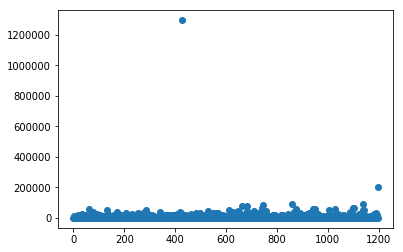

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

Есть один дорогой заказ в районе 200 000 и один сверхдорогой более 1 200 000. Вероятно, из-за них наблюдаются скачки в предыдущих графиках.

### 9. 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000, и не более 1% дороже 58 233. Логично выбрать границу в 28 000, а всё, что выше - отсеивать.

### 10. Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения

In [28]:
visitors_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = (visitors_a_daily
 .apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]
       .agg({'date' : 'max', 'visitors_per_date_a' : 'sum'}), axis=1)
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = (visitors_b_daily
 .apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]
       .agg({'date' : 'max', 'visitors_per_date_b' : 'sum'}), axis=1)
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
 .groupby('date', as_index=False)
 .agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = (orders_a_daily
 .apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]
        .agg({'date' : 'max', 'orders_per_date_a' : 'sum', 'revenue_per_date_a' : 'sum'}), axis=1)
 .sort_values(by=['date'])
)
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

orders_b_daily = (orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
 .groupby('date', as_index=False)
 .agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = (orders_b_daily
 .apply(lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]
            .agg({'date' : 'max', 'orders_per_date_b' : 'sum', 'revenue_per_date_b' : 'sum'}), axis=1)
 .sort_values(by=['date'])
)
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

data = (orders_a_daily
 .merge(orders_b_daily, on='date', how='left')
 .merge(orders_a_cummulative, on='date', how='left')
 .merge(orders_b_cummulative, on='date', how='left')
 .merge(visitors_a_daily, on='date', how='left')
 .merge(visitors_b_daily, on='date', how='left')
 .merge(visitors_a_cummulative, on='date', how='left')
 .merge(visitors_b_cummulative, on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [29]:
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_users_b.columns = ['user_id', 'orders']

sample_a = (pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                                    len(orders_by_users_a['orders'])), name='orders')],axis=0)
)
sample_b = (pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                                    len(orders_by_users_b['orders'])), name='orders')],axis=0)
)

In [30]:
# функция расчета теста Манна-Уитни
def mannwhitneyu(data_1, data_2):
    p_value = st.mannwhitneyu(data_1, data_2)[1]
    print(f'p-value {p_value:.3f}')
    if (p_value < 0.05):
        print("Поддерживаем альтернативную гипотезу: разница статистически значима")
    else:
        print("Поддерживаем нулевую гипотезу, разница статистически не значима")
    rate = data_2.mean() / data_1.mean() - 1
    print(f'Относительный прирост группы B {rate:.3f}')

In [31]:
mannwhitneyu(sample_a, sample_b)

p-value 0.008
Поддерживаем альтернативную гипотезу: разница статистически значима
Относительный прирост группы B 0.138


p-value менее 0.05. Значит, поддерживаем альтернативную гипотезу: разница в конверсии между группами по «сырым» данным статистически значима. Относительный прирост конверсии группы B 13.8%.

### 11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения

In [32]:
mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

p-value 0.365
Поддерживаем нулевую гипотезу, разница статистически не значима
Относительный прирост группы B 0.259


p-value не менее 0.05. Значит, поддерживаем нулевую гипотезу: разница в среднем чеке заказа между группами по «сырым» данным статистически не значима. Средний чек группы B превышает чек в группе A на 25.9%. Это превышение обусловлено наличием дорогих заказов в группе B.

### 12. Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения

In [33]:
users_with_many_orders = (pd
 .concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
         orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id']], axis = 0)
)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
abnormal_users = (pd
 .concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()
)
sample_a_filtered = (pd
 .concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
         pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - 
                                      len(orders_by_users_a['orders'])),name='orders')],axis=0)
)
sample_b_filtered = (pd
 .concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
         pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                      len(orders_by_users_b['orders'])),name='orders')],axis=0)
)

In [34]:
mannwhitneyu(sample_a_filtered, sample_b_filtered)

p-value 0.007
Поддерживаем альтернативную гипотезу: разница статистически значима
Относительный прирост группы B 0.173


p-value менее 0.05. Как и по "сырым" данным, поддерживаем альтернативную гипотезу: разница в конверсии между группами по "очищенным" данным статистически значима. Относительный прирост конверсии группы B по "очищенным" данным 17.3%, что больше прироста по "сырым" данным на четверть.

### 13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения

In [35]:
sample_a_filtered = (orders
 [np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
)
sample_b_filtered = (orders
 [np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
)

In [36]:
mannwhitneyu(sample_a_filtered, sample_b_filtered)

p-value 0.369
Поддерживаем нулевую гипотезу, разница статистически не значима
Относительный прирост группы B -0.020


p-value не менее 0.05. Как и по "сырым" данным, поддерживаем нулевую гипотезу: разница в среднем чеке между группами по "очищенным" данным статистически не значима. Средний чек группы B по "очищенным" данным меньше среднего чека группы A на 2%, то есть средние чеки практически выравнились.

### 14. Решение по результатам теста. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [37]:
filtered_visitors = (orders
 .query('visitor_id in @abnormal_users')
 .groupby(['date', 'group'], as_index=False)
 .agg({'visitor_id': 'nunique'})
 .rename(columns={'visitor_id': 'abnormal_visitors'})
 .merge(visitors, on=['date', 'group'], how='right')
 .fillna(0)
 .assign(filtered_visitors = lambda x: x.visitors - x.abnormal_visitors)
 .sort_values(['date', 'group'])
 .drop(columns=['abnormal_visitors', 'visitors'])
 .rename(columns={'filtered_visitors': 'visitors'})
)
filtered_visitors['visitors'] = filtered_visitors['visitors'].astype('int')

#### 14. Конверсия

График относительного изменения кумулятивной конверсии группы B к группе A по сырым данным


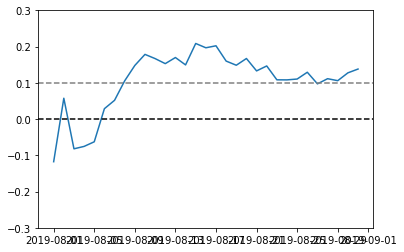

In [38]:
print('График относительного изменения кумулятивной конверсии группы B к группе A по сырым данным')
show_merged_cummulative_conversions(show_cummulative_data())

График относительного изменения кумулятивной конверсии группы B к группе A по очищенным данным


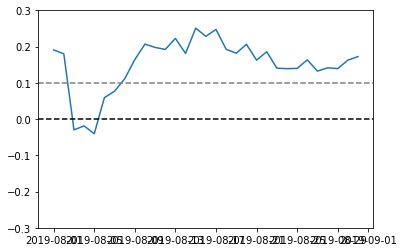

In [39]:
print('График относительного изменения кумулятивной конверсии группы B к группе A по очищенным данным')
(show_merged_cummulative_conversions(show_cummulative_data(table_visitors=filtered_visitors,
        table_orders=orders.query('visitor_id not in @abnormal_users')))
)

Есть статистически значимое различие по конверсии между группами и по «сырым», и по "очищенным" данным.

В целом отношение конверсии установилось.

Можно сделать вывод по конверсии: конверсия группы B больше конверсии группы A на 17.3% по очищенным данным.

#### 14. Средний чек

График относительного изменения кумулятивного среднего чека группы B к группе A по сырым данным


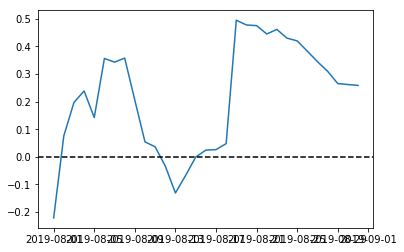

In [40]:
print('График относительного изменения кумулятивного среднего чека группы B к группе A по сырым данным')
show_cummulative_revenue(show_cummulative_data())

График относительного изменения кумулятивного среднего чека группы B к группе A по очищенным данным


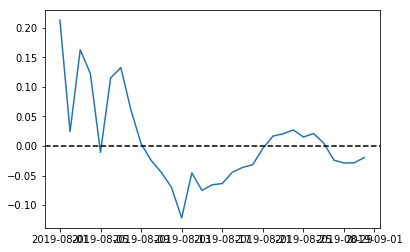

In [41]:
print('График относительного изменения кумулятивного среднего чека группы B к группе A по очищенным данным')
(show_cummulative_revenue((show_cummulative_data(table_visitors=filtered_visitors,
        table_orders=orders.query('visitor_id not in @abnormal_users')))))

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным;

График различия среднего чека между группами по очищенным данным говорит о том, что результаты стабилизировались около нуля плюс/минус 3%, на последнюю известную дату средний чек группы B на 2% меньше среднего чека группы A.

Можно сделать вывод по среднему чеку: средний чек практически не различается в группах.

#### 14. Вывод

Пора остановить тест и признать победу группы B по конверсии, зафиксировать отсутствие статистических различий по среднему чеку.

## Общий вывод

### Часть  0. Загрузка данных и подготовка их к анализу. Вывод

Представленные таблицы не содержат дубли и пропуски. В таблице hypothesis названия колонок преобразованы к нижнему регистру. Во таблицах visitors и orders типы колонок с датами преобразованы к datetime. В таблице orders названия двух колонок изменены для лучшей читабельности.

### Часть  1. Приоритизация гипотез. Вывод

Топ-5 гипотез в ICE: 8, 0, 7, 6, 2. Топ-5 гипотез в RICE: 7, 2, 0, 6, 8. Фреймворк RICE включает в себя параметр Reach — скольких пользователей затронет изменение. Поэтому в RICE в приоритете те гипотезы, которые относятся к большему количеству пользователей.

### Часть  2. Анализ A/B-теста. Вывод

#### 1. График кумулятивной выручки по группам. Вывод

Выручка увеличивается в течение всего теста. Однако график выручки группы B в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### 2. График кумулятивного среднего чека по группам. Вывод

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

#### 3. График относительного изменения кумулятивного среднего чека группы B к группе A. Вывод

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

#### 4. График кумулятивной конверсии по группам. Вывод

Симметричный график получился! Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

#### 5. График относительного изменения кумулятивной конверсии группы B к группе A. Вывод

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия немного падала, но теперь стабильнее. В целом отношение конверсии установилось, и можно сделать вывод по тесту: конверсия группы B больше конверсии группы A. 

#### 6. Точечный график количества заказов по пользователям. Вывод

Выводы подтверждаются: много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

#### 7. 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей. Вывод

Не более 5% пользователей оформляли больше чем 2 заказа. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### 8. Точечный график стоимостей заказов. Вывод

Есть один дорогой заказ в районе 200 000 и один сверхдорогой более 1 200 000. Вероятно, из-за них наблюдаются скачки в предыдущих графиках.

#### 9. 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов. Вывод

Не более 5% заказов дороже 28 000, и не более 1% дороже 58 233. Логично выбрать границу в 28 000, а всё, что выше - отсеивать.

#### 10. Статистическая значимость различий в конверсии между группами по «сырым» данным. Вывод

p-value менее 0.05. Значит, поддерживаем альтернативную гипотезу: разница в конверсии между группами по «сырым» данным статистически значима. Относительный прирост конверсии группы B 13.8%.

#### 11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Вывод

p-value не менее 0.05. Значит, поддерживаем нулевую гипотезу: разница в среднем чеке заказа между группами по «сырым» данным статистически не значима. Средний чек группы B превышает чек в группе A на 25.9%. Это превышение обусловлено наличием дорогих заказов в группе B.

#### 12. Статистическая значимость различий в конверсии между группами по «очищенным» данным. Вывод

p-value менее 0.05. Как и по "сырым" данным, поддерживаем альтернативную гипотезу: разница в конверсии между группами по "очищенным" данным статистически значима. Относительный прирост конверсии группы B по "очищенным" данным 17.3%, что больше прироста по "сырым" данным на четверть.

#### 13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Вывод

p-value не менее 0.05. Как и по "сырым" данным, поддерживаем нулевую гипотезу: разница в среднем чеке между группами по "очищенным" данным статистически не значима. Средний чек группы B по "очищенным" данным меньше среднего чека группы A на 2%, то есть средние чеки практически выравнились.

#### 14. Решение по результатам теста. Вывод

Есть статистически значимое различие по конверсии между группами и по «сырым», и по "очищенным" данным.

В целом отношение конверсии установилось.

Можно сделать вывод по конверсии: конверсия группы B больше конверсии группы A на 17.3% по очищенным данным.

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным;

График различия среднего чека между группами по очищенным данным говорит о том, что результаты стабилизировались около нуля плюс/минус 3%, на последнюю известную дату средний чек группы B на 2% меньше среднего чека группы A.

Можно сделать вывод по среднему чеку: средний чек практически не различается в группах.

Пора остановить тест и признать победу группы B по конверсии, зафиксировать отсутствие статистических различий по среднему чеку.